In [1]:
import lightgbm as lgb 
from sklearn.datasets import load_diabetes

In [2]:
from lgb2sql import lgb2sql

In [3]:
X,y = load_diabetes(return_X_y=True)
import numpy as np 
X_1 = np.random.rand(442,15)
X = np.concatenate([X,X_1],axis=1)
import pandas as pd 
df = pd.DataFrame(X,columns=[f'f_{i}' for i in range(X.shape[1])])

In [4]:
model = lgb.LGBMRegressor(n_estimators=10,max_depth=5)

In [5]:
model.fit(df,y)

LGBMRegressor(max_depth=5, n_estimators=10)

In [6]:
exporter = lgb2sql(model)

<AxesSubplot:>

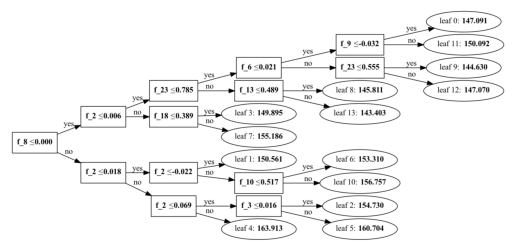

In [7]:
import matplotlib.pyplot as plt 
lgb.plot_tree(model)

In [8]:
model.feature_importances_

array([ 1,  3, 26, 11,  4,  2,  9,  0, 18, 10,  2,  2,  2,  7,  6,  4,  5,
        3,  7,  1,  4,  3,  1, 10,  2], dtype=int32)

In [9]:
exporter

In [10]:
sqls = exporter.export_sql('','userid','regress_rumo')
with open('./a.txt','w',encoding='utf-8') as f :
    f.write(sqls)

print(sqls)
    

SELECT 
 userid 
 ,subtree_0+subtree_1+subtree_2+subtree_3+subtree_4+subtree_5+subtree_6+subtree_7+subtree_8+subtree_9 AS Score 
 FROM( 
SELECT 
 userid 
,CASE WHEN f_8 <= 1.0000000180025095e-35 OR f_8 is null THEN
    CASE WHEN f_2 <= 0.006188884713822097 OR f_2 is null THEN
        CASE WHEN f_23 <= 0.7846034583684776 OR f_23 is null THEN
            CASE WHEN f_6 <= 0.021027815919496564 OR f_6 is null THEN
                CASE WHEN f_9 <= -0.032143499361724386 OR f_9 is null THEN
                    147.0905061401793
                ELSE
                    150.0915643428143
                END
            ELSE
                CASE WHEN f_23 <= 0.555464847632857 OR f_23 is null THEN
                    144.62951077422406
                ELSE
                    147.07013577091786
                END
            END
        ELSE
            CASE WHEN f_13 <= 0.4894922474175455 OR f_13 is null THEN
                145.8106119624296
            ELSE
                143.40346910755738
 

In [11]:
pred = model.predict(X)
df['python'] = pred